<https://kaggle-kr.tistory.com/17?category=868316>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
# sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

데이터 구성 확인 -> EDA -> preprocessing(or feature engineering) -> modeling -> training -> 모델 평가

### 1. Dataset 확인

In [2]:
trains = pd.read_csv("../input/titanic/train.csv")
tests = pd.read_csv("../input/titanic/test.csv")

In [3]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


이용할 것은 Pclass, Age, SibSp, Parch, Fare와 Survived

- Pclass: 티켓의 클래스, Age: 나이, SibSp: 함께 탑승한 형제와 배우자의 수, Parch: 함께 탑승한 부모, 아이의 수, Fare: 탑승료
- Survived: 생존여부

In [4]:
trains.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
tests.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 1. Null check

In [6]:
for col in trains.columns:
    print("column: {:>10}\tPercent of NaN value: {:.2f}%"
        .format(col, 100 * (trains[col].isnull().sum() / trains[col].shape[0])))

column: PassengerId	Percent of NaN value: 0.00%
column:   Survived	Percent of NaN value: 0.00%
column:     Pclass	Percent of NaN value: 0.00%
column:       Name	Percent of NaN value: 0.00%
column:        Sex	Percent of NaN value: 0.00%
column:        Age	Percent of NaN value: 19.87%
column:      SibSp	Percent of NaN value: 0.00%
column:      Parch	Percent of NaN value: 0.00%
column:     Ticket	Percent of NaN value: 0.00%
column:       Fare	Percent of NaN value: 0.00%
column:      Cabin	Percent of NaN value: 77.10%
column:   Embarked	Percent of NaN value: 0.22%


In [7]:
for col in tests.columns:
    print("column: {:>10}\t Percent of NaN value: {:.2f}%"
         .format(col, 100 * (tests[col].isnull().sum() / tests[col].shape[0])))

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


결측값을 시각적으로 확인하자면

<AxesSubplot:>

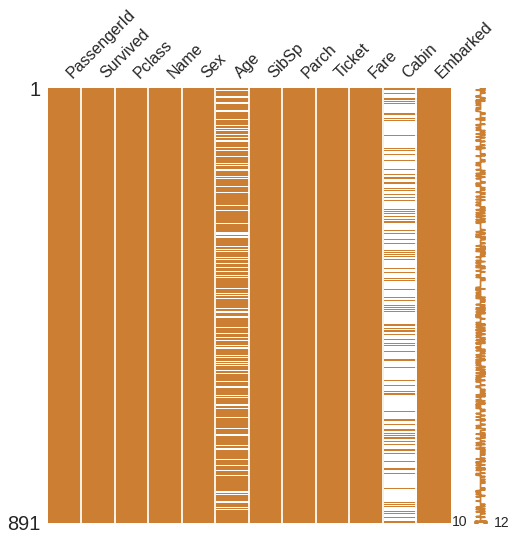

In [8]:
msno.matrix(df=trains, figsize=(8, 8), color=(0.8, 0.5, 0.2))

전체 index를 기준으로 해당 index가 NaN이라면 칠하지 않는다.

<AxesSubplot:>

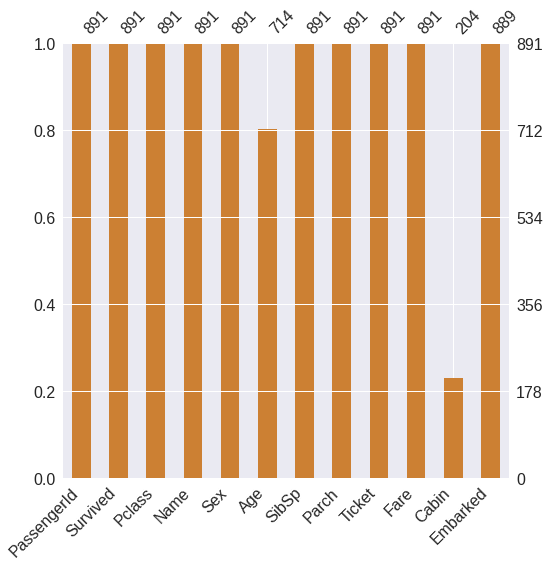

In [9]:
msno.bar(df=trains, figsize=(8, 8), color=(0.8, 0.5, 0.2))

전체를 1로 했을 때, NaN이 아닌 비율을 bar로 표시

<AxesSubplot:>

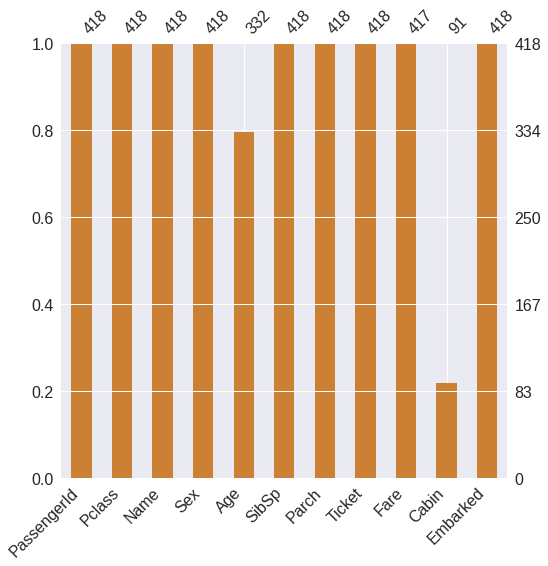

In [10]:
msno.bar(df=tests, figsize=(8, 8), color=(0.8, 0.5, 0.2))

#### 2. Target label 확인

- Survived(0, 1) -> Binary Classification

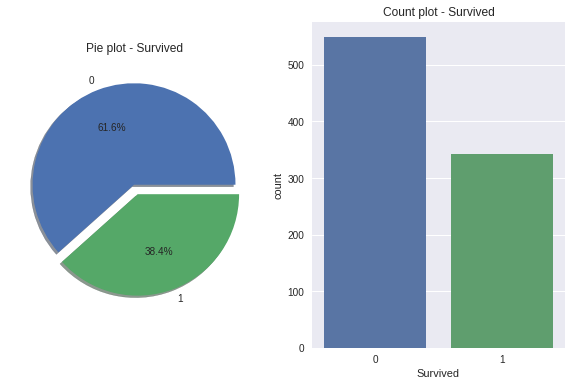

In [15]:
_, ax = plt.subplots(1, 2, figsize=(10, 6))

trains["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%",
                                           ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')

sns.countplot("Survived", data=trains, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

output으로 이용할 data가 한 경우만 가진 것이 아니라서 이로 인한 모델 붕괴는 가능성이 낮음.

### 2. Exploratory data analysis

분석하고자 한 feature와 target(label, class or output)과의 관계를 살펴보자.

#### 1. Pclass

In [16]:
trains[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
trains[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
pd.crosstab(trains["Pclass"], trains["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
trains[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

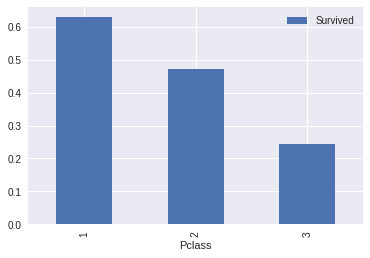

In [20]:
trains[["Pclass", "Survived"]].groupby(["Pclass"],
    as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

슬프게도 특정 class일수록 생존률이 높았다.

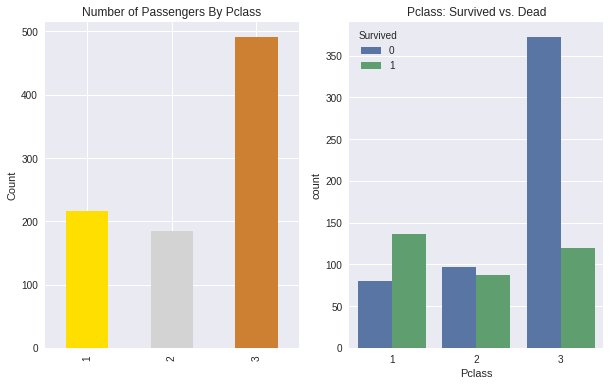

In [21]:
y_position = 1.02
_, ax = plt.subplots(1, 2, figsize=(10, 6))

trains["Pclass"].value_counts().plot.bar(color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax=ax[0])
ax[0].set_ylabel("Count")
ax[0].set_title("Number of Passengers By Pclass")

sns.countplot("Pclass", hue="Survived", data=trains, ax=ax[1])
ax[1].set_title("Pclass: Survived vs. Dead")
plt.show()

3 클래스가 가장 많았으나 사망자도 가장 많았다. 슬프게도 생존률도 낮았다.

#### 2. Sex

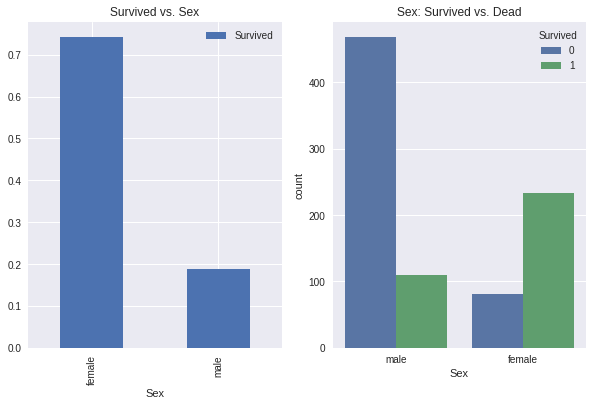

In [22]:
_, ax = plt.subplots(1, 2, figsize=(10, 6))

trains[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs. Sex")

sns.countplot("Sex", hue="Survived", data=trains, ax=ax[1])
ax[1].set_title("Sex: Survived vs. Dead")

plt.show()

타이타닉이 유명하죠, 취약계층에 대한 구조가 먼저, 많이 이루어진 침몰 사고로.<br />
생각보다 3인 이상 가족도 많았고, 아이도 많았고.

In [23]:
trains[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [24]:
pd.crosstab(trains["Sex"], trains["Survived"], margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 3. Both Sex and Pclass

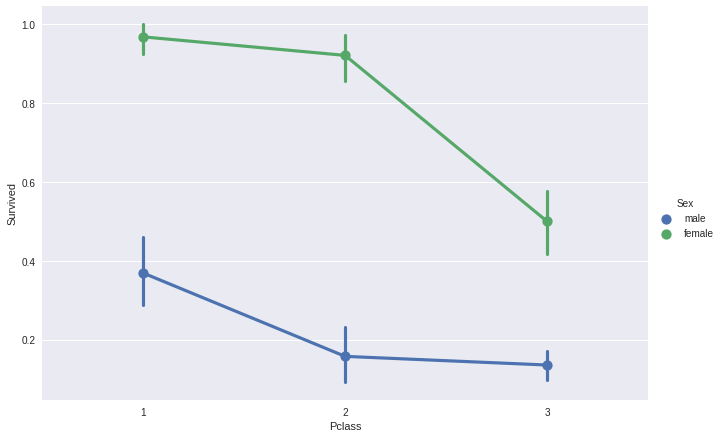

In [25]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=trains, size=6, aspect=1.5)

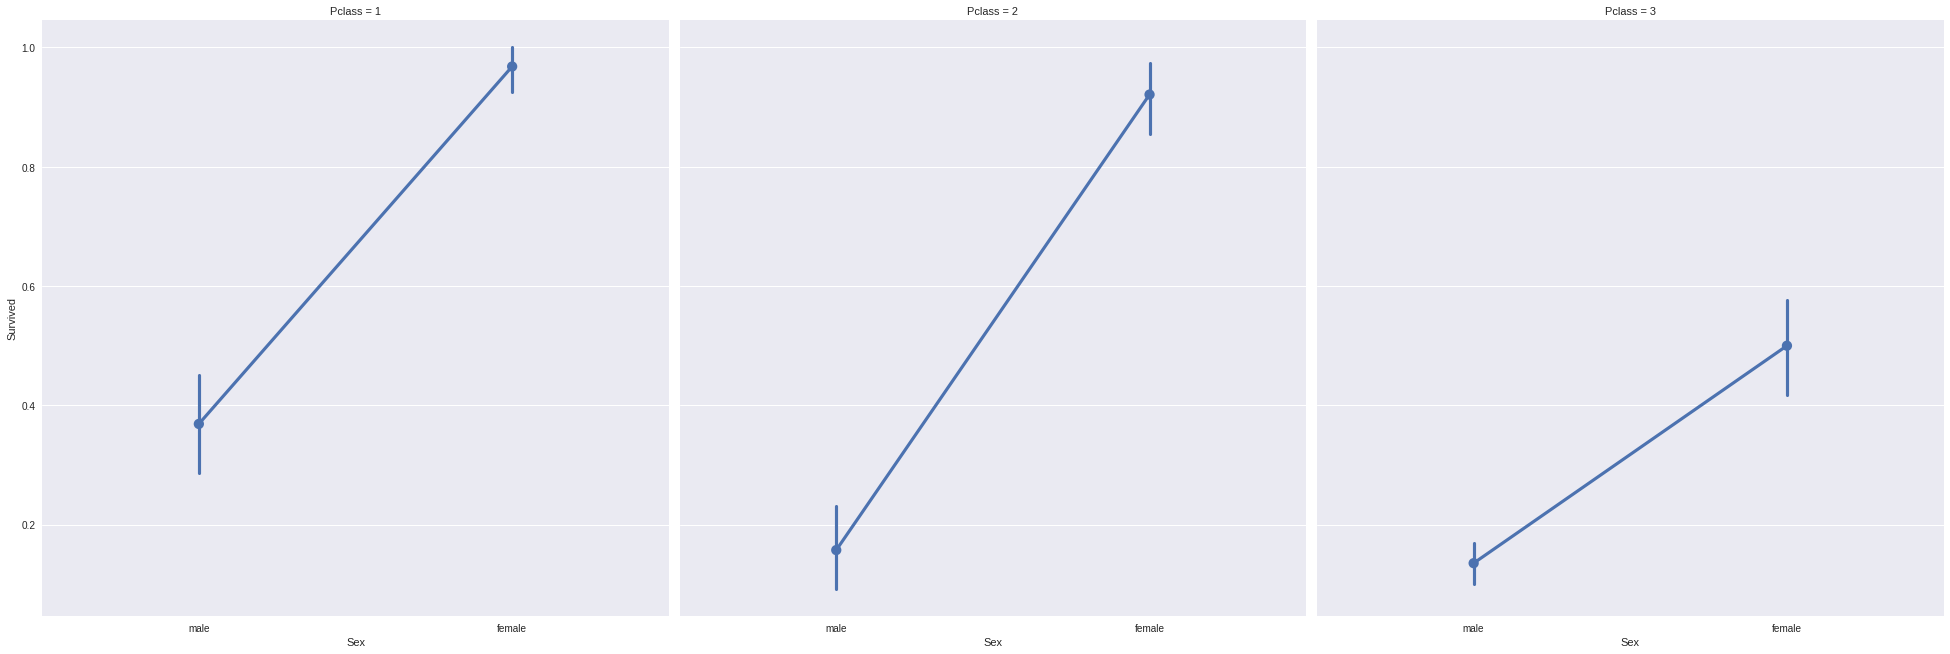

In [26]:
sns.factorplot("Sex", "Survived", col="Pclass", data=trains, satureation=.5,
               size=9, aspect=1)

#### 4. Age

In [28]:
print("제일 나이 많은 탑승객: {:.1f} Years".format(trains["Age"].max()),
     "제일 어린 탑승객: {:.1f} Years".format(trains["Age"].min()),
     "탑승객 평균 나이: {:.1f} Years".format(trains["Age"].mean()), sep="\n")

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


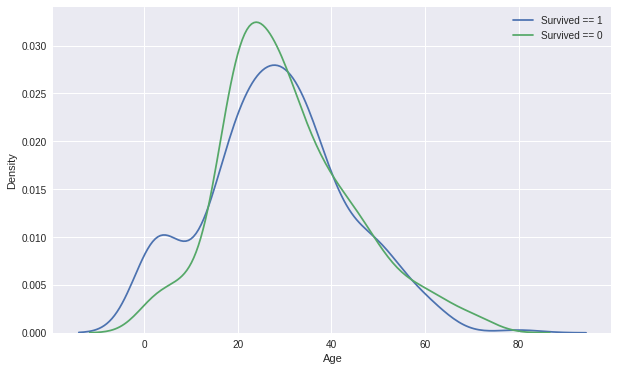

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(trains[trains["Survived"] == 1]["Age"])
sns.kdeplot(trains[trains["Survived"] == 0]["Age"])
plt.legend(["Survived == 1", "Survived == 0"])
plt.show()

어린 쪽에 생존률이 높은 구간 존재

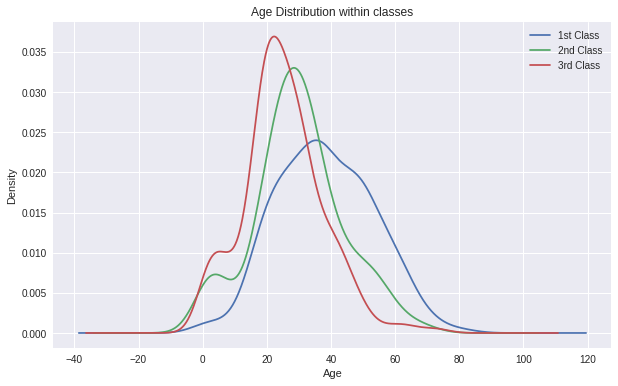

In [30]:
plt.figure(figsize=(10, 6))
trains["Age"][trains["Pclass"] == 1].plot(kind="kde")
trains["Age"][trains["Pclass"] == 2].plot(kind="kde")
trains["Age"][trains["Pclass"] == 3].plot(kind="kde")

plt.xlabel("Age")
plt.title("Age Distribution within classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()

class가 높을수록 정규분포에 가깝다.

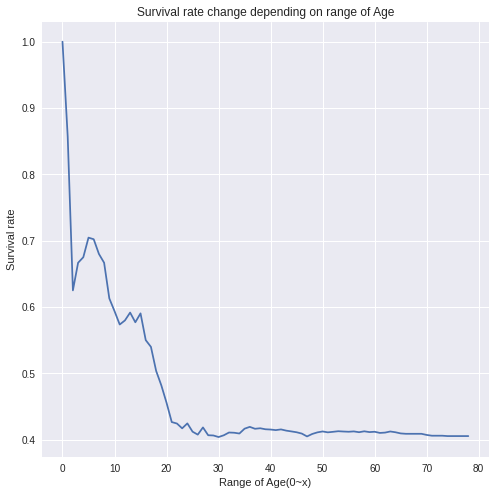

In [31]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(trains[trains["Age"] < i]["Survived"].sum() / len(trains[trains["Age"] < i]["Survived"]))

plt.figure(figsize=(8, 8))
plt.plot(cummulate_survival_ratio)
plt.title("Survival rate change depending on range of Age")
plt.ylabel("Survival rate")
plt.xlabel("Range of Age(0~x)")
plt.show()

확실히 어릴수록 생존률일 높다.

#### 5. Pclass, Sex, Age

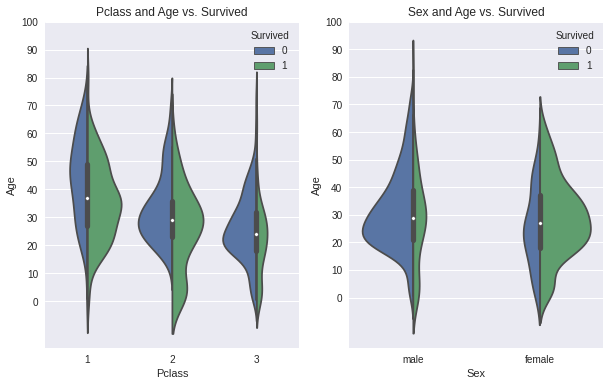

In [32]:
_, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.violinplot("Pclass", "Age", hue="Survived", data=trains, scale="count",
              split=True, ax=ax[0])
ax[0].set_yticks(range(0, 110, 10))
ax[0].set_title("Pclass and Age vs. Survived")

sns.violinplot("Sex", "Age", hue="Survived", data=trains, scale="count",
              split=True, ax=ax[1])
ax[1].set_yticks(range(0, 110, 10))
ax[1].set_title("Sex and Age vs. Survived")

plt.show()

지금까지를 종합적으로 보여주는 그림, violinplot이랑 kdeplot은 시각화에 꽤 효과적이다.

#### 6. Embarked

탑승항구, 근데 앞서 언급한 feature도 아닌데 갑자기 왜?

<AxesSubplot:xlabel='Embarked'>

<Figure size 576x576 with 0 Axes>

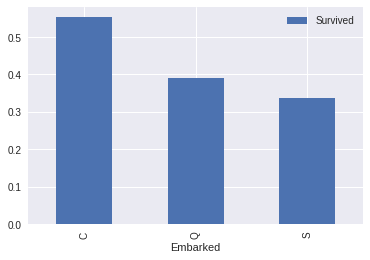

In [33]:
plt.figure(figsize=(8, 8))
trains[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar()

다른 feature과 각각 하지만 한 번에 시각화

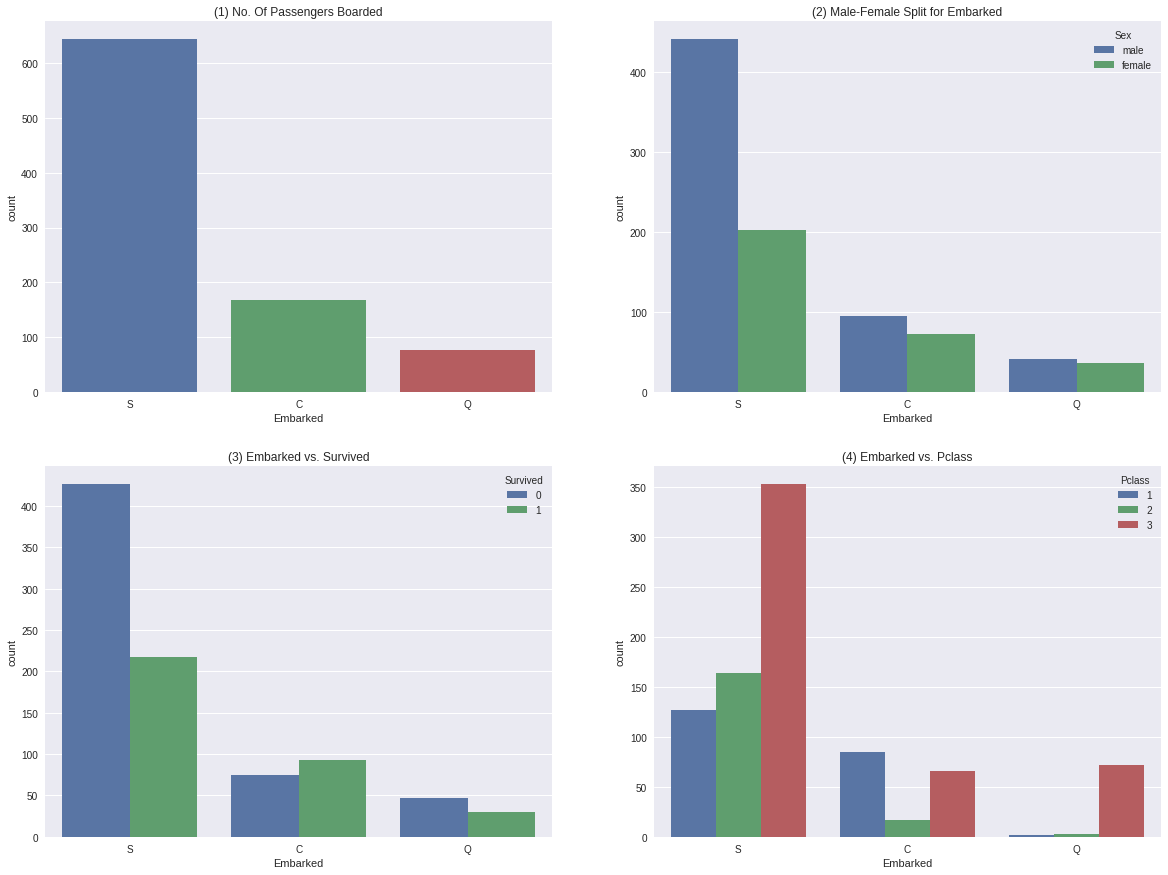

In [35]:
_, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot("Embarked", data=trains, ax=ax[0, 0])
ax[0, 0].set_title("(1) No. Of Passengers Boarded")

sns.countplot("Embarked", hue="Sex", data=trains, ax=ax[0, 1])
ax[0, 1].set_title("(2) Male-Female Split for Embarked")

sns.countplot("Embarked", hue="Survived", data=trains, ax=ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs. Survived")

sns.countplot("Embarked", hue="Pclass", data=trains, ax=ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs. Pclass")

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

사람도 생존률도 Embarked 'S'에 수가 많다.

#### 7. Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [37]:
trains["FamilySize"] = trains["SibSp"] + trains["Parch"] + 1
tests["FamilySize"] = tests["SibSp"] + tests["Parch"] + 1

In [40]:
print("Maximum size of Family: %d" % trains["FamilySize"].max(),
      "Minimum size of Family: %d" % trains["FamilySize"].min(), sep="\n")

Maximum size of Family: 11
Minimum size of Family: 1


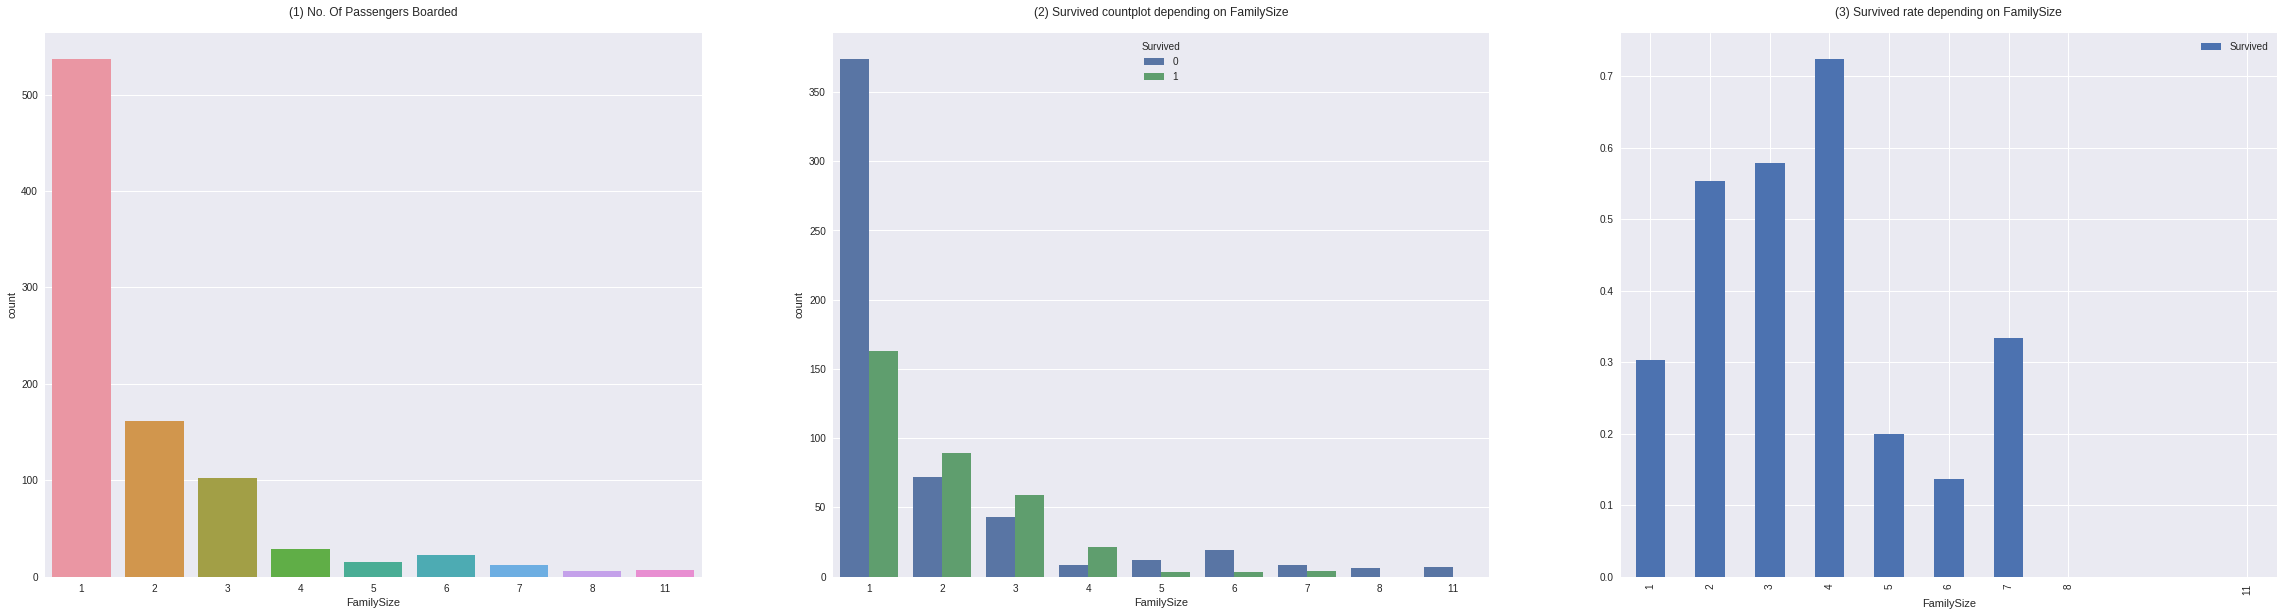

In [42]:
_, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot("FamilySize", data=trains, ax=ax[0])
ax[0].set_title("(1) No. Of Passengers Boarded", y=1.02)

sns.countplot("FamilySize", hue="Survived", data=trains, ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y=1.02)

trains[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize", y=1.02)

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

1. 확실히 싱글이 많았다.
2. 확실히 싱글의 생존률이 낮지만, 단순 비교론 생존자가 가장 많다.
3. 적당하다는 표현이 이상하지만, 가족 구성원이 그리 많지 않았을 때 생존률이 가장 높았다.

#### 8. Fare

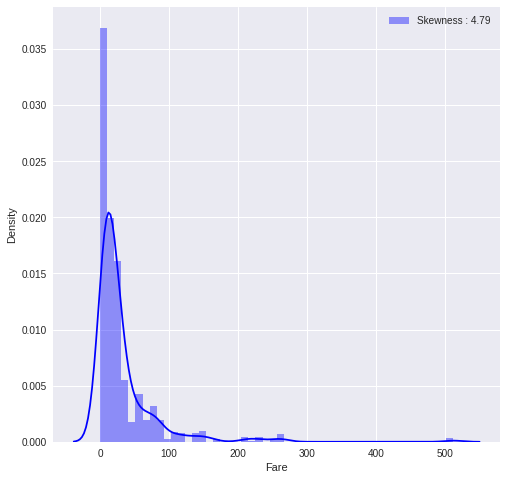

In [44]:
plt.figure(figsize=(8, 8))
sns.distplot(trains["Fare"], color='b',
             label="Skewness : {:.2f}".format(trains["Fare"].skew()))
plt.legend(loc="best")
plt.show()

뭐지, 탑승료가 저렇게 높은 건 단체이기 때문인 건가.

쨌든 상당히 큰 값이라 제거하거나 재표현을 해야 하는데,<br />
이 분은 변환의 사다리고 뭐고, 일반적으로 이용할 수 있는 log 변환을 이용하고자 하는 듯하다.

In [45]:
tests.loc[tests.Fare.isnull(), "Fare"] = tests["Fare"].mean()
trains["Fare"] = trains["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
tests["Fare"] = tests["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

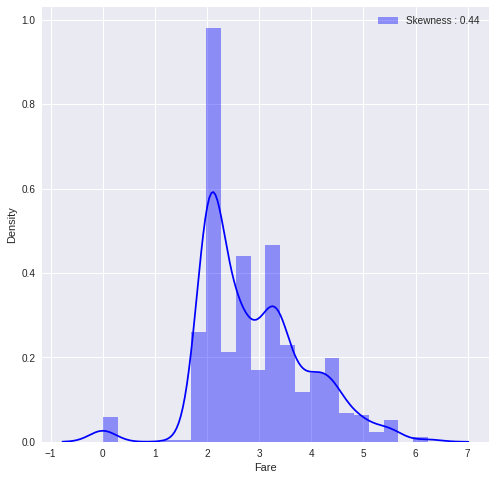

In [46]:
plt.figure(figsize=(8, 8))
sns.distplot(trains["Fare"], color='b',
            label="Skewness : {:.2f}".format(trains["Fare"].skew()))
plt.legend(loc="best")
plt.show()

너무 log가 잘 취해진 data다. 이론 data만큼 잘 만들어진 건 처음 보는 듯.

#### 9. Carbin

- 해보고 싶었지만, NaN이 80%로 너무 많다. 그러므로 제외.

In [47]:
trains.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


#### 10. Ticket

In [ ]:
trains["Ticket"].value_counts()